__CalCOFI Hackathon Basic Framework Tester__

Packages:

In [264]:
import numpy as np  # provides multi-dimensional array and matrices functionality
import pandas as pd  # provides interface for interacting with tabular data
import matplotlib.pyplot as plt  # provides plotting tools
import seaborn as sns  # visualization tools
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter
# %conda install folium -c conda-forge
import folium  # gis visualization

Import the data. Please change it to where you stode bottle.csv and CalCOFIStationOrder.csv

In [265]:
cc = pd.read_csv("bottle.csv")  # CalCOFI bottle data
coords = pd.read_csv("CalCOFIStationOrder.csv")

Cleaning Bottle Data:

In [266]:
surface = cc[cc['Depthm'] == 0]  # select surface level data

aspects = surface[['Sta_ID', 'Depth_ID', 'T_degC', 'Salnty', 'O2ml_L', 'ChlorA']].fillna(0)  # tentative data layers separation, replace NaNs with 0

yymm = list(aspects["Depth_ID"])  # using Depth_ID to extract year and month, add to dataframe
year = []
month = []
for i in yymm:
    yr = int(i[:2] + i[3:5])
    mon = int(i[5:7])
    year.append(yr)
    month.append(mon)

aspects.insert(1,"Year", year, True)
aspects.insert(2, "Month", month, True)
del aspects["Depth_ID"]

# We select year 2015 because it doesn't have the missing data
aspects_15 = aspects[aspects['Year']==2015]  # selecting April of 2015
spring_15 = aspects_15[aspects_15['Month']==4]
spring_15.head()

,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA
850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632
850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522
850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717
850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537
850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271


In [267]:
# reset the index and rename Sta_ID
spring_15 = spring_15.reset_index()

In [268]:
# I'm assuming first one is line, second one is Sta
spring_15['Line'] = spring_15['Sta_ID'].map(lambda x: float(x.split()[0]))

In [269]:
spring_15['Sta'] = spring_15['Sta_ID'].map(lambda x: float(x.split()[1]))

In [270]:
spring_15.head()

,index,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA,Line,Sta
0,850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632,76.7,49.0
1,850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522,76.7,51.0
2,850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717,76.7,55.0
3,850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537,76.7,60.0
4,850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271,76.7,70.0


Station ID Coordinate Data Manipulation:

In [271]:
# coords
lat_lon = coords[['Line', 'Sta', 'Lat (dec)', 'Lon (dec)']]
lat_lon.head()

,Line,Sta,Lat (dec),Lon (dec)
0,93.3,26.7,32.95637,-117.30538
1,93.4,26.4,32.94905,-117.27357
2,91.7,26.4,33.24350,-117.46542
3,93.3,28.0,32.91304,-117.39438
4,93.3,30.0,32.84637,-117.53122


In [272]:
spring_15_clean = spring_15.merge(lat_lon, on=['Line', 'Sta'], how='left')

In [273]:
spring_15_clean = spring_15_clean.rename(columns={'Lat (dec)':'Latitude', 'Lon (dec)':'Longitude'})

In [274]:
spring_15_clean.head()

,index,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA,Line,Sta,Latitude,Longitude
0,850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632,76.7,49.0,35.08824,-120.77740
1,850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522,76.7,51.0,35.02158,-120.91782
2,850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717,76.7,55.0,34.88824,-121.19831
3,850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537,76.7,60.0,34.72158,-121.54828
4,850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271,76.7,70.0,34.38824,-122.24608


/Users/stevenwu/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:404: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


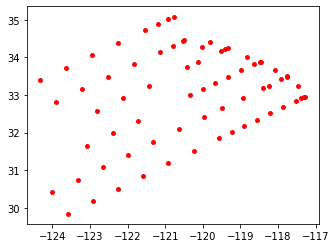

In [275]:
# trying to visualize all stations, not successful
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = spring_15_clean[['Longitude', 'Latitude']]

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
#gdf.plot(ax=world[world.continent == 'North America'].plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [276]:
spring_15_clean

,index,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA,Line,Sta,Latitude,Longitude
0,850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632,76.7,49.0,35.08824,-120.77740
1,850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522,76.7,51.0,35.02158,-120.91782
2,850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717,76.7,55.0,34.88824,-121.19831
3,850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537,76.7,60.0,34.72158,-121.54828
4,850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271,76.7,70.0,34.38824,-122.24608
5,850702,076.7 080.0,2015,4,15.421,33.2245,5.841,0.266,76.7,80.0,34.05491,-122.94109
6,850730,076.7 090.0,2015,4,15.443,33.0521,5.856,0.166,76.7,90.0,33.72158,-123.63335
7,850759,076.7 100.0,2015,4,16.524,33.1025,5.756,0.095,76.7,100.0,33.38824,-124.32289
8,850787,080.0 050.5,2015,4,12.377,33.4793,5.027,0.508,80.0,50.5,34.46667,-120.48906
9,850793,080.0 051.0,2015,4,10.836,33.5288,5.123,5.300,80.0,51.0,34.45000,-120.52390


Bellow is the Leaflet graph. We are trying to add layers to this map.

In [277]:
m = folium.Map(location=[32.879411,-117.211136], tiles="Stamen Terrain")
m

In [278]:

import numpy as np  # provides multi-dimensional array and matrices functionality
import pandas as pd  # provides interface for interacting with tabular data
import matplotlib.pyplot as plt  # provides plotting tools
import seaborn as sns  # visualization tools
%matplotlib inline
from scipy.ndimage.filters import gaussian_filter
# %conda install folium -c conda-forge
import folium  # gis visualization
from folium import plugins
from folium.plugins import HeatMap  # heatmap visualization package

In [304]:
spring_15_clean['T_weight'] = (5 + (spring_15_clean['T_degC'] - np.mean(spring_15_clean['T_degC'])) / np.std(spring_15_clean['T_degC']))**3

In [305]:
spring_15_clean

,index,Sta_ID,Year,Month,T_degC,Salnty,O2ml_L,ChlorA,Line,Sta,Latitude,Longitude,T_weight
0,850578,076.7 049.0,2015,4,11.510,33.5598,7.114,22.632,76.7,49.0,35.08824,-120.77740,13.143974
1,850588,076.7 051.0,2015,4,12.675,33.3538,6.647,2.522,76.7,51.0,35.02158,-120.91782,27.750621
2,850608,076.7 055.0,2015,4,13.669,33.2469,6.210,0.717,76.7,55.0,34.88824,-121.19831,46.544318
3,850638,076.7 060.0,2015,4,14.151,33.2475,6.320,1.537,76.7,60.0,34.72158,-121.54828,58.109859
4,850666,076.7 070.0,2015,4,15.318,33.1735,5.876,0.271,76.7,70.0,34.38824,-122.24608,93.702185
5,850702,076.7 080.0,2015,4,15.421,33.2245,5.841,0.266,76.7,80.0,34.05491,-122.94109,97.402651
6,850730,076.7 090.0,2015,4,15.443,33.0521,5.856,0.166,76.7,90.0,33.72158,-123.63335,98.205463
7,850759,076.7 100.0,2015,4,16.524,33.1025,5.756,0.095,76.7,100.0,33.38824,-124.32289,143.309102
8,850787,080.0 050.5,2015,4,12.377,33.4793,5.027,0.508,80.0,50.5,34.46667,-120.48906,23.314931
9,850793,080.0 051.0,2015,4,10.836,33.5288,5.123,5.300,80.0,51.0,34.45000,-120.52390,7.689352


In [312]:
m = folium.Map(location=[32.88719,-117.2546], tiles="Stamen Terrain")  # general mapping

for i in range(len(list(spring_15_clean['Latitude']))):  # station spring_15_clean
    folium.Marker(location=[list(spring_15_clean['Latitude'])[i],list(spring_15_clean['Longitude'])[i]], popup=list(spring_15_clean['Sta_ID'])[i], icon=folium.Icon(color="red", icon="info-sign", prefix='fa')).add_to(m)

heat_data = [[row['Latitude'],row['Longitude'],row['T_weight']] for index, row in spring_15_clean.iterrows()]

# Plot it on the map
HeatMap(heat_data,name='Temperatire(C)', min_opacity=0.3, max_zoom=18, radius=100, blur=30, gradient = None, overlay=True, control=True, show=False).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))

folium.LayerControl(position='topleft').add_to(m)

# Display the map
m

In [280]:
spring_15_clean['T_degC']

0     11.510
1     12.675
2     13.669
3     14.151
4     15.318
5     15.421
6     15.443
7     16.524
8     12.377
9     10.836
10    13.565
11    14.479
12    16.074
13    15.368
14    15.471
15    15.803
16    14.761
17    13.491
18    15.681
19    14.832
20    14.260
21    15.221
22    13.476
23    17.276
24    16.236
25    15.966
26    15.261
27    16.949
28    14.735
29    16.584
       ...  
40    17.452
41    16.163
42    17.142
43    17.097
44    17.520
45    16.056
46    17.288
47    16.896
48    17.282
49    17.441
50    15.897
51    16.313
52    16.940
53    18.420
54    18.623
55    19.120
56    18.994
57    18.676
58    18.530
59    17.820
60    16.242
61    16.067
62    17.282
63    16.774
64    18.327
65    17.518
66    17.338
67    17.988
68    17.792
69    19.012
Name: T_degC, Length: 70, dtype: float64